# <center> STATS 607 - LECTURE 11
## <center> 10/10/2018

![title](ML_Slide03.png)

![title](ML_Slide04.png)

Some examples from the "Elements of Statistical Learning" book (see [here](https://web.stanford.edu/~hastie/ElemStatLearn/)):

* Predict whether a patient, hospitalized due to a heart attack, will have a second heart attack. The prediction is to be based on demographic, diet and clinical measurements for that patient.

* Predict the price of a stock in 6 months from now, on the basis of company performance measures and economic data.

* Identify the numbers in a handwritten ZIP code, from a digitized image.

* Estimate the amount of glucose in the blood of a diabetic person, from the infrared absorption spectrum of that person’s blood.

* Identify the risk factors for prostate cancer, based on clinical and demographic variables.

![title](ML_Slide05.png)

![title](ML_Slide06.png)

## <center> Regression

In [1]:
import numpy as np
import pandas as pd

advs = pd.read_csv('advertising.csv') # Creates a dataframe.
advs

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [2]:
advs.shape # Obtains the number of lines and columns of the dataframe.

(200, 4)

In [3]:
advs.dtypes # Obtains the dataframe main types.

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [4]:
advs.describe() # Provides a statistical summary of the data.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. See [here](https://www.statsmodels.org/stable/index.html).

Lets see now how to run a simple linear regression using statsmodels:

In [5]:
import statsmodels.formula.api as smf

lrmfit = smf.ols('Sales ~ TV', data=advs).fit() # Fit a linear regression model with one single covariate.

In [6]:
print(lrmfit.summary()) # Print model summary.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        12:38:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

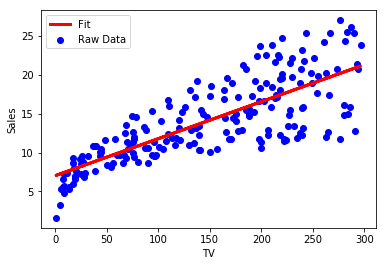

In [7]:
# Creates a scatter plot of 'Sales' as a function of 'TV'
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(advs['TV'], advs['Sales'], color='blue')
plt.plot(advs['TV'], lrmfit.predict(), color='red',linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(['Fit','Raw Data']);

In [8]:
from scipy.stats.stats import pearsonr

pr = pearsonr(advs.TV,advs.Sales) # Obtain pearson correlation as well as associated p-value.
r2= pr[0]**2 

# Just comparing the two R2s.
print(r2)
print(lrmfit.rsquared)

0.6118750508500709
0.611875050850071


In [9]:
pr[0]*(np.std(advs.Sales)/np.std(advs.TV)) # Obtain regression coefficient from pearson correlation.

0.04753664043301971

Now lets see now how to run a multiple linear regression using statsmodels:

In [10]:
# Fit a linear regression model with all covariates.
mlrmfit = smf.ols('Sales ~ TV + Radio + Newspaper', data=advs).fit()

In [11]:
print(mlrmfit.summary()) # Displays the outcome of the model.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        12:38:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [12]:
# Obtain prediction for a new test set.
new_obs_DT = pd.DataFrame([[145,20,25],[170,25,40]], columns=['TV','Radio','Newspaper'])

print(new_obs_DT)
print(mlrmfit.predict(new_obs_DT))

    TV  Radio  Newspaper
0  145     20         25
1  170     25         40
0    13.319426
1    15.390630
dtype: float64


## <center> Classification

In [13]:
wines = pd.read_csv('wine.csv') # Creates a dataframe with the data named 'wines'.

In [14]:
# Removes selected columns from the dataframe.
wines = wines.drop(['white','color','free.sulfur.dioxide','density','quality'], axis=1)
wines.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,67.0,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,60.0,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4,Bad


In [15]:
wines.shape # Obtains the number of lines and columns of the dataframe.

(6497, 10)

In [16]:
wines.dtypes # Obtains the dataframe main types.

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
total.sulfur.dioxide    float64
pH                      float64
sulphates               float64
alcohol                 float64
good                     object
dtype: object

In [17]:
wines.describe() # Provides a statistical summary of the data.

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,115.744574,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,56.521855,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,6.000000,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,77.000000,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,118.000000,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,156.000000,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,440.000000,4.010000,2.000000,14.900000


Scikit-Learn provides efficient tools for data analysis. It is built on top of NumPy, SciPy, and Matplotlib. See [here](http://scikit-learn.org/stable/).

In [18]:
wines.columns = [col.replace('.','') for col in wines.columns] # Rename columns of the dataframe.

In [19]:
wines['good'] = pd.factorize(wines['good'])[0] # Converts column income into an integer.

In [20]:
wines['good'].describe()

count    6497.000000
mean        0.633061
std         0.482007
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: good, dtype: float64

In [21]:
# Set formula for classification.
formula = 'good ~ -1 + fixedacidity + volatileacidity + citricacid + residualsugar + ' + \
                   'chlorides + totalsulfurdioxide + pH + sulphates + alcohol'

In [22]:
from patsy import dmatrices

y, X = dmatrices(formula, wines, return_type = 'dataframe') # Obtain the design matrix.

In [23]:
X.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,totalsulfurdioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,34.0,3.51,0.56,9.4


In [24]:
y.head()

,good
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [25]:
# The dependent variable needs to be a unidimensional vector rather than a dataframe.
y = y['good'].values
y

array([0., 0., 0., ..., 1., 1., 1.])

In [26]:
from sklearn.model_selection import train_test_split

# Obtain the data for the fitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=.2, stratify = y)

![title](Random_Forests/Slide04.png)

![title](Random_Forests/Slide05.png)

![title](Random_Forests/Slide18.png)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest.
RF = RandomForestClassifier(criterion='gini')

In [28]:
# Set param_grid options for the model.
RFOpts = {'max_features': np.arange(2,7), 'n_estimators': np.arange(10,60,10)}

![title](Random_Forests/Slide22.png)

In [29]:
from sklearn.model_selection import GridSearchCV

# Performs search on a grid.
gridCV = GridSearchCV(RF, cv=10, param_grid=RFOpts, return_train_score=True)
modelGrid = gridCV.fit(X_train, y_train)

Lets see how good was the performance while training the model:

In [30]:
print(modelGrid.best_params_) # Displays the optimal parameters values.
print(np.round(modelGrid.best_score_,2)) # Displays the best cross-validation score of all grid points.

{'max_features': 3, 'n_estimators': 40}
0.83


Now lets test the model with an independent test set (that was not used in the training process):

In [31]:
# Obtain the model predictions (both probabilities and classes in one single dataframe).
y_pred_prob = modelGrid.predict_proba(X_test) # Obtain probability predictions.
y_pred_class = modelGrid.predict(X_test) # Obtain class predictions.

Lets create a dataframe with the probabilities and the predicted class:

In [32]:
y_pred = pd.DataFrame(y_pred_prob, columns=['Prob Class A', 'Prob Class B'])
y_pred['Predicted Class'] = y_pred_class
y_pred.head(10)

,Prob Class A,Prob Class B,Predicted Class
0,0.000,1.000,1.0
1,0.775,0.225,0.0
2,0.150,0.850,1.0
3,0.200,0.800,1.0
4,0.625,0.375,0.0
5,1.000,0.000,0.0
6,0.100,0.900,1.0
7,0.575,0.425,0.0
8,0.125,0.875,1.0
9,0.025,0.975,1.0


In [33]:
from sklearn import metrics

# Display the accuracy score.
print('Model Accuracy Score: ', np.round(metrics.accuracy_score(y_test, y_pred['Predicted Class']),2))

Model Accuracy Score:  0.8


In [34]:
# Obtains and displays the confusion matrix.
cm = metrics.confusion_matrix(y_test, y_pred['Predicted Class'].values)

cm_df = pd.DataFrame(cm, index = ['Real Class A','Real Class B'], columns = ['Predicted Class A','Predicted Class B'])
cm_df = cm_df/cm_df.sum().sum()
cm_df

,Predicted Class A,Predicted Class B
Real Class A,0.246154,0.120769
Real Class B,0.080769,0.552308


Here is an example with several metrics commonly used:

![title](Random_Forests/Slide23.png)